In [185]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [186]:
# 현재 경로 확인
os.getcwd()

'D:\\Python\\machine_learning'

In [187]:
# 데이터 불러오기
corolla = pd.read_csv('./data/ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [188]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print('nCar : %d' % nCar, 'nVar : %d' % nVar)

nCar : 1436 nVar : 37


## 범주형 변수를 이진형 변수로 변환

In [189]:
# 가변수 생성
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [190]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [191]:
# 연료타임에 대한 위치 인덱스를 저장
p_idx = np.array(corolla.Fuel_Type == 'Petrol')
d_idx = np.array(corolla.Fuel_Type == 'Diesel')
c_idx = np.array(corolla.Fuel_Type == 'CNG')

In [192]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [193]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_p[p_idx] = 1 # Petrol
dummy_d[d_idx] = 1 # Diesel
dummy_c[c_idx] = 1 # CNG

In [194]:
dummy_d

array([1, 1, 1, ..., 0, 0, 0])

## 불필요한 변수 제거 및 가변수 추가

In [195]:
# np or dict to DF
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

# column slice
corolla_ = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mir_data = pd.concat((corolla_, Fuel), 1)

In [196]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [197]:
mir_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [198]:
# bias 추가
mir_data = sm.add_constant(mir_data, has_constant='add')
mir_data.head()

C:\Users\THESF\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [199]:
feature_columns = list(mir_data.columns.difference(['Price']))
X = mir_data[feature_columns]
y = mir_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [200]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [201]:
fitted_full_model.summary() ## R2가 높고, 대부분의 변수들이 유의

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:02:30   Log-Likelihood:                -8455.2
No. Observations:                1005   AIC:                         1.698e+04
Df Residuals:                     971   BIC:                         1.715e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -267.3175    137.041     -1.951      0.051    -536.248       1.613
Age_08_04         -119.4746      4.182    -28.568      0.000    -127.682    -111.268
Airbag_1            -3.5901    263.212     -0.014      0.989    -520.119     512.939
Airbag_2            -9.9667    139.159     -0.072      0.943    -283.054     263.120
Airco              221.8494     95.803      2.316      0.021      33.845     409.854
Automatic          364.0267    161.126      2.259      0.024      47.831     680.223
Automatic_airco   2422.1288    199.985     12.112      0.000    2029.676    2814.581
BOVAG_Guarantee    409.6464    138.766      2.952      0.003     137.331     681.962
Backseat_Divider  -191.1122    137.225     -1.393      0.164    -460.403      78.179
Boardcomputer     -289.2989    125.905     -2.298      0.022    -536.376     -42.222
CD_Player          159.9748    105.332      1.519      0.129     -46.729     366.679
CNG              -1131.8401    260.873     -4.339      0.000   -1643.781    -619.900
Central_Lock       110.0297    146.597      0.751      0.453    -177.654     397.713
Cylinders           -0.0315      0.002    -12.954      0.000      -0.036      -0.027
Diesel             265.2914    202.378      1.311      0.190    -131.858     662.441
Doors               74.1648     43.934      1.688      0.092     -12.052     160.382
Gears              291.1291    229.406      1.269      0.205    -159.060     741.318
Guarantee_Period    67.8221     16.443      4.125      0.000      35.554     100.090
HP                  21.7561      3.750      5.802      0.000      14.398      29.114
KM                  -0.0162      0.001    -11.934      0.000      -0.019      -0.014
Met_Color            6.5518     81.313      0.081      0.936    -153.017     166.121
Metallic_Rim       205.6256    102.745      2.001      0.046       3.997     407.254
Mfg_Month          -90.0807     10.941     -8.233      0.000    -111.551     -68.610
Mfg_Year             1.6701      0.956      1.748      0.081      -0.205       3.545
Mfr_Guarantee      229.9762     77.111      2.982      0.003      78.653     381.299
Mistlamps          -82.1619    117.429     -0.700      0.484    -312.605     148.282
Petrol             866.5409    217.120      3.991      0.000     440.462    1292.620
Power_Steering    -177.6012    283.401     -0.627      0.531    -733.750     378.547
Powered_Windows    253.6195    148.632      1.706      0.088     -38.057     545.296
Quarterly_Tax       12.8035      2.048      6.253      0.000       8.785      16.822
Radio              571.0934    660.092      0.865      0.387    -724.277    1866.464
Radio_cassette    -747.8008    660.679     -1.132      0.258   -2044.324     548.722
Sport_Model        312.3800     93.467      3.342      0.001     128.959     495.801
Tow_Bar           -219.

## VIF를 통한 다중공선성 확인

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(
mir_data.values, i) for i in range(mir_data.shape[1])]
vif['features'] = mir_data.columns
vif

C:\Users\THESF\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\THESF\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


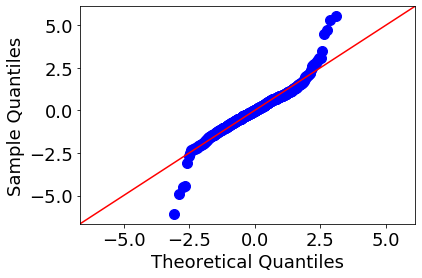

In [203]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid # residual
pred_y = fitted_full_model.predict(train_x)
# q-q plot 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

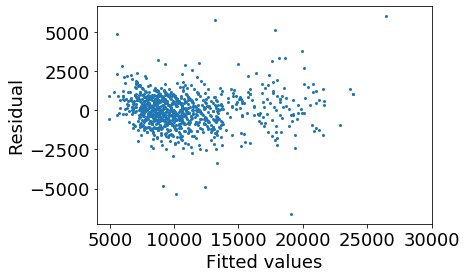

In [204]:
# residual pattern 확인
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlim(4000, 30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [205]:
pred_y = fitted_full_model.predict(test_x) ## 검증 데이터에 대한 예측

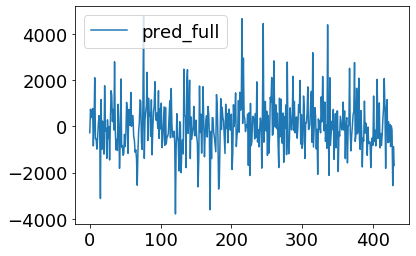

In [206]:
plt.plot(np.array(test_y - pred_y),label='pred_full')
plt.legend()
plt.show()

In [207]:
from sklearn.metrics import mean_squared_error

In [208]:
mean_squared_error(y_true = test_y, y_pred = pred_y)

1281668.9348049976

## 변수선택법

In [209]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)]) # Modeling
    regr = model.fit() # 모델 학습
    AIC = regr.aic # 모델의 AIC
    return {'model': regr, "AIC":AIC}

print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x17B0E8B0>, 'AIC': 19074.915916547663}


In [210]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x16b18610>,
 'AIC': 16978.37804862579}

In [211]:
import time
import itertools
# getBest : 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo = (list(combo) + ['const'])
        
        results.append(processSubset(X,y,feature_set=combo)) # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], 'models on', k, "predictors in", (toc - tic), "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y, k=2))

Processed  630 models on 2 predictors in 0.9660031795501709 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17484.3
Name: 211, dtype: object


C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


In [212]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo) + ['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [213]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns = ['AIC','model'])
tic=time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x, y=train_y, k=i)
toc = time.time()
print('Total elapsed time:', (toc-tic), "seconds.")

C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


Processed  36 models on 1 predictors in 0.08900070190429688 seconds.
Processed  630 models on 2 predictors in 1.0550010204315186 seconds.
Processed  7140 models on 3 predictors in 11.69136929512024 seconds.
Total elapsed time: 13.086371183395386 seconds.


In [214]:
models

,AIC,model
1,17734.111076,<statsmodels.regression.linear_model.Regressio...
2,17484.293905,<statsmodels.regression.linear_model.Regressio...
3,17322.104671,<statsmodels.regression.linear_model.Regressio...


In [215]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2050.
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:02:45   Log-Likelihood:                -8657.1
No. Observations:                1005   AIC:                         1.732e+04
Df Residuals:                    1001   BIC:                         1.734e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0224      0.001    -16.538      0.000      -0.025      -0.020
Mfg_Year    1473.6641     38.046     38.733      0.000    1399.004    1548.324
Weight        19.1049      0.980     19.491      0.000      17.181      21.028
const      -2.955e+06   7.56e+04    -39.109      0.000    -3.1e+06   -2.81e+06
==============================================================================
Omnibus:                      221.779   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3243.701
Skew:                          -0.575   Prob(JB):                         0.00
Kurtosis:                      11.726   Cond. No.                     1.41e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
# 모든 변수들 모델링 한것과 비교
print("full model Rsquared: ", "{:.5f}".format(fitted_full_model.rsquared))
print('full model AIC: ', "{:.5f}".format(fitted_full_model.aic))
print('full model MSE: ', "{:.5f}".format(fitted_full_model.mse_total))
print('selected model Rsquared: ', "{:.5f}".format(models.loc[3, 'model'].rsquared))
print('selected model AIC: ', "{:.5f}".format(models.loc[3, 'model'].aic))
print('selected model MSE: ', "{:.5f}".format(models.loc[3, 'model'].mse_total))

full model Rsquared:  0.90635
full model AIC:  16978.37805
full model MSE:  12705029.19405
selected model Rsquared:  0.86004
selected model AIC:  17322.10467
selected model MSE:  12705029.19405


C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  if sys.path[0] == '':
C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the futu

Text(0, 0.5, 'BIC')

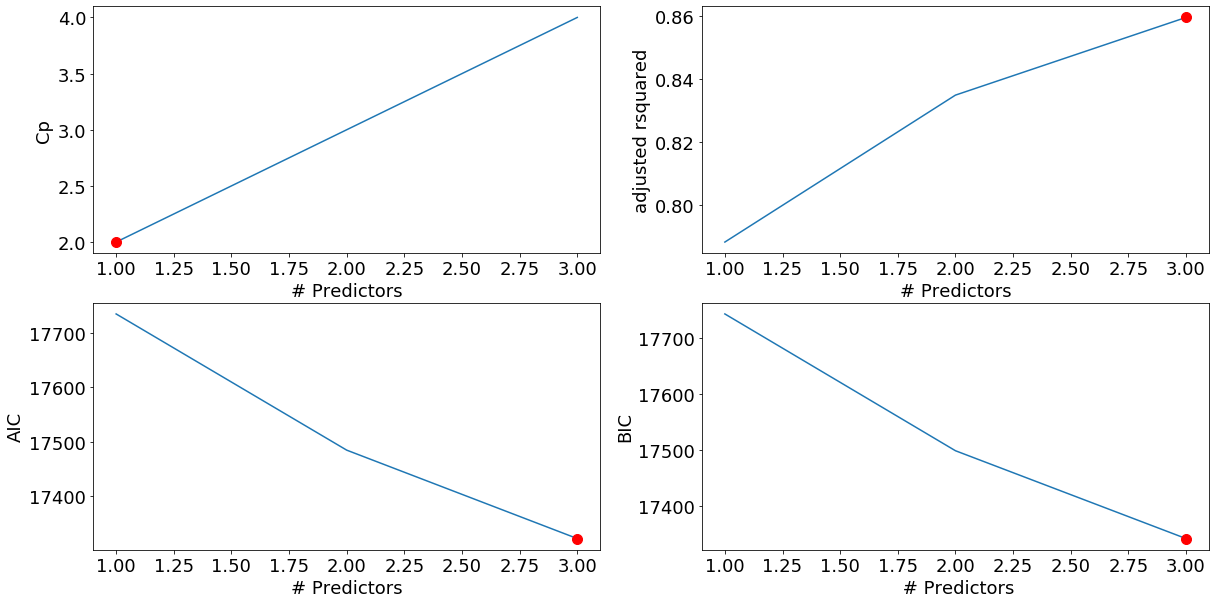

In [217]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

## 전진선택법

In [218]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [219]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [220]:
Forward_best_model = forward_model(X=train_x, y=train_y)

C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


Processed  36 models on 1 predictors in 0.06299805641174316
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x385E3AD0>
Processed  35 models on 2 predictors in 0.0579988956451416
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x385E3BF0>
Processed  34 models on 3 predictors in 0.05800008773803711
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x385E3E30>
Processed  33 models on 4 predictors in 0.05899930000305176
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x385C1370>
Processed  32 models on 5 predictors in 0.06700301170349121
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'const']  AIC: 

In [221]:
Forward_best_model.aic

16964.86294326561

In [222]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     393.2
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:02:47   Log-Likelihood:                -8457.4
No. Observations:                1005   AIC:                         1.696e+04
Df Residuals:                     980   BIC:                         1.709e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1438.5008     49.464     29.082      0.000    1341.434    1535.568
Automatic_airco   2357.7565    186.950     12.612      0.000    1990.888    2724.625
KM                  -0.0162      0.001    -12.037      0.000      -0.019      -0.014
Weight               8.5681      1.497      5.722      0.000       5.629      11.507
HP                  22.1888      3.637      6.101      0.000      15.051      29.326
Powered_Windows    317.5227     87.983      3.609      0.000     144.866     490.179
Quarterly_Tax       12.9694      1.997      6.495      0.000       9.051      16.888
Petrol            2021.4722    430.660      4.694      0.000    1176.349    2866.595
Guarantee_Period    69.4371     15.898      4.368      0.000      38.240     100.635
Sport_Model        348.7284     89.200      3.910      0.000     173.684     523.773
Mfr_Guarantee      237.8228     75.873      3.134      0.002      88.930     386.715
Diesel            1397.1197    408.681      3.419      0.001     595.129    2199.110
Airco              226.0872     91.906      2.460      0.014      45.732     406.442
Tow_Bar           -216.0541     82.287     -2.626      0.009    -377.534     -54.574
ABS               -297.2000    105.538     -2.816      0.005    -504.307     -90.093
Mfg_Month           29.1330     10.837      2.688      0.007       7.866      50.400
BOVAG_Guarantee    414.7825    136.985      3.028      0.003     145.964     683.601
Boardcomputer     -281.8323    124.729     -2.260      0.024    -526.599     -37.065
Automatic          338.8665    159.164      2.129      0.034      26.524     651.209
Metallic_Rim       218.3008     96.618      2.259      0.024      28.698     407.903
Backseat_Divider  -237.3592    125.642     -1.889      0.059    -483.918       9.200
Radio_cassette    -174.7941    105.812     -1.652      0.099    -382.439      32.851
CD_Player          154.2663    102.494      1.505      0.133     -46.866     355.399
Doors               64.6970     43.234      1.496      0.135     -20.145     149.539
const             -2.88e+06   9.85e+04    -29.227      0.000   -3.07e+06   -2.69e+06
==============================================================================
Omnibus:                      109.817   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              850.083
Skew:                           0.084   Prob(JB):                    2.55e-185
Kurtosis:                       7.502   Cond. No.                     2.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+08. This might indicate that there are
strong multicollinearity or other numerical pr

## 후진소거법

In [223]:
### 후진선택법(step = 1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y=y, feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) -1, 'predictors in', (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names, ' AIC:',best_model[0])
    return best_model

In [224]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1, len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X, y, predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y=train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print('Total elapsed time:', (toc-tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [225]:
Backward_best_model = backward_model(X=train_x, y=train_y)

C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  # Remove the CWD from sys.path while we load stuff.


Processed  36 models on 35 predictors in 0.1569993495941162
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1CC84030>
Processed  35 models on 34 predictors in 0.14099812507629395
Selected predictors: ['ABS', 'Age_08_04', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', '

In [226]:
Backward_best_model.aic

16964.862943265613

In [227]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     393.2
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:02:48   Log-Likelihood:                -8457.4
No. Observations:                1005   AIC:                         1.696e+04
Df Residuals:                     980   BIC:                         1.709e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -297.2000    105.538     -2.816      0.005    -504.307     -90.093
Airco              226.0872     91.906      2.460      0.014      45.732     406.442
Automatic          338.8665    159.164      2.129      0.034      26.524     651.209
Automatic_airco   2357.7565    186.950     12.612      0.000    1990.888    2724.625
BOVAG_Guarantee    414.7825    136.985      3.028      0.003     145.964     683.601
Backseat_Divider  -237.3592    125.642     -1.889      0.059    -483.918       9.200
Boardcomputer     -281.8323    124.729     -2.260      0.024    -526.599     -37.065
CD_Player          154.2663    102.494      1.505      0.133     -46.866     355.399
CNG              -5.651e+04   1926.998    -29.325      0.000   -6.03e+04   -5.27e+04
Cylinders        -6.644e+05   2.27e+04    -29.220      0.000   -7.09e+05    -6.2e+05
Diesel           -5.511e+04   1889.385    -29.169      0.000   -5.88e+04   -5.14e+04
Doors               64.6970     43.234      1.496      0.135     -20.145     149.539
Guarantee_Period    69.4371     15.898      4.368      0.000      38.240     100.635
HP                  22.1888      3.637      6.101      0.000      15.051      29.326
KM                  -0.0162      0.001    -12.037      0.000      -0.019      -0.014
Metallic_Rim       218.3008     96.618      2.259      0.024      28.698     407.903
Mfg_Month           29.1330     10.837      2.688      0.007       7.866      50.400
Mfg_Year          1438.5008     49.464     29.082      0.000    1341.434    1535.568
Mfr_Guarantee      237.8228     75.873      3.134      0.002      88.930     386.715
Petrol           -5.449e+04   1908.170    -28.555      0.000   -5.82e+04   -5.07e+04
Powered_Windows    317.5227     87.983      3.609      0.000     144.866     490.179
Quarterly_Tax       12.9694      1.997      6.495      0.000       9.051      16.888
Radio_cassette    -174.7941    105.812     -1.652      0.099    -382.439      32.851
Sport_Model        348.7284     89.200      3.910      0.000     173.684     523.773
Tow_Bar           -216.0541     82.287     -2.626      0.009    -377.534     -54.574
Weight               8.5681      1.497      5.722      0.000       5.629      11.507
const            -1.661e+05   5684.654    -29.220      0.000   -1.77e+05   -1.55e+05
==============================================================================
Omnibus:                      109.817   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              850.083
Skew:                           0.084   Prob(JB):                    2.55e-185
Kurtosis:                       7.502   Cond. No.                     1.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

## 단계적 선택법

In [228]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [229]:
Stepwise_best_model = Stepwise_model(X=train_x,y=train_y)

C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  
C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  # Remove the CWD from sys.path while we load stuff.


Processed  36 models on 1 predictors in 0.05900120735168457
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0F994270>
forward
Processed  1 models on 0 predictors in 0.0029990673065185547
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0F994D10>
Processed  35 models on 2 predictors in 0.053999900817871094
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0F994770>
forward
Processed  2 models on 1 predictors in 0.0049970149993896484
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1CCA9DF0>
Processed  34 models on 3 predictors in 0.0540003776550293
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object 

Processed  16 models on 15 predictors in 0.037999868392944336
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Mfr_Guarantee', 'Diesel', 'Airco', 'Tow_Bar', 'ABS', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0F994610>
Processed  20 models on 17 predictors in 0.052041053771972656
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Mfr_Guarantee', 'Diesel', 'Airco', 'Tow_Bar', 'ABS', 'Age_08_04', 'BOVAG_Guarantee', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1CC9C7D0>
forward
Processed  17 models on 16 predictors in 0.04200148582458496
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', '

Processed  25 models on 24 predictors in 0.07799744606018066
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'Sport_Model', 'Mfr_Guarantee', 'Diesel', 'Airco', 'Tow_Bar', 'ABS', 'Age_08_04', 'BOVAG_Guarantee', 'Boardcomputer', 'Automatic', 'Metallic_Rim', 'Backseat_Divider', 'Radio_cassette', 'CD_Player', 'Doors', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0F994B10>
backward
Processed  12 models on 25 predictors in 0.037001609802246094
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'Sport_Model', 'Mfr_Guarantee', 'Diesel', 'Airco', 'Tow_Bar', 'ABS', 'Age_08_04', 'BOVAG_Guarantee', 'Boardcomputer', 'Automatic', 'Metallic_Rim', 'Backseat_Divider', 'Radio_cassette', 'CD_Player', 'Doors', 'CNG', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResu

Processed  25 models on 24 predictors in 0.07700085639953613
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'Sport_Model', 'Mfr_Guarantee', 'Diesel', 'Airco', 'Tow_Bar', 'ABS', 'Age_08_04', 'BOVAG_Guarantee', 'Boardcomputer', 'Automatic', 'Metallic_Rim', 'Backseat_Divider', 'Radio_cassette', 'CD_Player', 'Doors', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0F9A1BB0>
backward
Processed  12 models on 25 predictors in 0.03799772262573242
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'Sport_Model', 'Mfr_Guarantee', 'Diesel', 'Airco', 'Tow_Bar', 'ABS', 'Age_08_04', 'BOVAG_Guarantee', 'Boardcomputer', 'Automatic', 'Metallic_Rim', 'Backseat_Divider', 'Radio_cassette', 'CD_Player', 'Doors', 'CNG', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResul

In [230]:
Stepwise_best_model.aic

16964.862943265594

## 성능평가

In [231]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(25,) (27,) (25,)


In [232]:
# 모델에 의해 예측된/추정된 값 <-> test_Y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [233]:
perf_mat = pd.DataFrame(columns=['ALL','FORWARD','BACKWARD','STEPWISE'],
                       index = ['MSE',"RMSE",'MAE','MAPE'])

In [234]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [235]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y, pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y, pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y, pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y, pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   1.28167e+06  1.27111e+06  1.27111e+06  1.27111e+06
RMSE      1132.11      1127.44      1127.44      1127.44
MAE       838.393      835.634      835.634      835.634
MAPE      8.22294      8.20123      8.20123      8.20123


In [236]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
25
27
25


In [237]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:02:52   Log-Likelihood:                -8455.2
No. Observations:                1005   AIC:                         1.698e+04
Df Residuals:                     971   BIC:                         1.715e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -267.3175    137.041     -1.951      0.051    -536.248       1.613
Age_08_04         -119.4746      4.182    -28.568      0.000    -127.682    -111.268
Airbag_1            -3.5901    263.212     -0.014      0.989    -520.119     512.939
Airbag_2            -9.9667    139.159     -0.072      0.943    -283.054     263.120
Airco              221.8494     95.803      2.316      0.021      33.845     409.854
Automatic          364.0267    161.126      2.259      0.024      47.831     680.223
Automatic_airco   2422.1288    199.985     12.112      0.000    2029.676    2814.581
BOVAG_Guarantee    409.6464    138.766      2.952      0.003     137.331     681.962
Backseat_Divider  -191.1122    137.225     -1.393      0.164    -460.403      78.179
Boardcomputer     -289.2989    125.905     -2.298      0.022    -536.376     -42.222
CD_Player          159.9748    105.332      1.519      0.129     -46.729     366.679
CNG              -1131.8401    260.873     -4.339      0.000   -1643.781    -619.900
Central_Lock       110.0297    146.597      0.751      0.453    -177.654     397.713
Cylinders           -0.0315      0.002    -12.954      0.000      -0.036      -0.027
Diesel             265.2914    202.378      1.311      0.190    -131.858     662.441
Doors               74.1648     43.934      1.688      0.092     -12.052     160.382
Gears              291.1291    229.406      1.269      0.205    -159.060     741.318
Guarantee_Period    67.8221     16.443      4.125      0.000      35.554     100.090
HP                  21.7561      3.750      5.802      0.000      14.398      29.114
KM                  -0.0162      0.001    -11.934      0.000      -0.019      -0.014
Met_Color            6.5518     81.313      0.081      0.936    -153.017     166.121
Metallic_Rim       205.6256    102.745      2.001      0.046       3.997     407.254
Mfg_Month          -90.0807     10.941     -8.233      0.000    -111.551     -68.610
Mfg_Year             1.6701      0.956      1.748      0.081      -0.205       3.545
Mfr_Guarantee      229.9762     77.111      2.982      0.003      78.653     381.299
Mistlamps          -82.1619    117.429     -0.700      0.484    -312.605     148.282
Petrol             866.5409    217.120      3.991      0.000     440.462    1292.620
Power_Steering    -177.6012    283.401     -0.627      0.531    -733.750     378.547
Powered_Windows    253.6195    148.632      1.706      0.088     -38.057     545.296
Quarterly_Tax       12.8035      2.048      6.253      0.000       8.785      16.822
Radio              571.0934    660.092      0.865      0.387    -724.277    1866.464
Radio_cassette    -747.8008    660.679     -1.132      0.258   -2044.324     548.722
Sport_Model        312.3800     93.467      3.342      0.001     128.959     495.801
Tow_Bar           -219.

In [238]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     393.2
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:02:52   Log-Likelihood:                -8457.4
No. Observations:                1005   AIC:                         1.696e+04
Df Residuals:                     980   BIC:                         1.709e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1088.9043    130.308      8.356      0.000     833.189    1344.620
Automatic_airco   2357.7565    186.950     12.612      0.000    1990.888    2724.625
KM                  -0.0162      0.001    -12.037      0.000      -0.019      -0.014
Weight               8.5681      1.497      5.722      0.000       5.629      11.507
HP                  22.1888      3.637      6.101      0.000      15.051      29.326
Powered_Windows    317.5227     87.983      3.609      0.000     144.866     490.179
Quarterly_Tax       12.9694      1.997      6.495      0.000       9.051      16.888
Guarantee_Period    69.4371     15.898      4.368      0.000      38.240     100.635
Sport_Model        348.7284     89.200      3.910      0.000     173.684     523.773
Mfr_Guarantee      237.8228     75.873      3.134      0.002      88.930     386.715
Diesel            -624.3525    323.806     -1.928      0.054   -1259.785      11.080
Airco              226.0872     91.906      2.460      0.014      45.732     406.442
Tow_Bar           -216.0541     82.287     -2.626      0.009    -377.534     -54.574
ABS               -297.2000    105.538     -2.816      0.005    -504.307     -90.093
Age_08_04          -29.1330     10.837     -2.688      0.007     -50.400      -7.866
BOVAG_Guarantee    414.7825    136.985      3.028      0.003     145.964     683.601
Boardcomputer     -281.8323    124.729     -2.260      0.024    -526.599     -37.065
Automatic          338.8665    159.164      2.129      0.034      26.524     651.209
Metallic_Rim       218.3008     96.618      2.259      0.024      28.698     407.903
Backseat_Divider  -237.3592    125.642     -1.889      0.059    -483.918       9.200
Radio_cassette    -174.7941    105.812     -1.652      0.099    -382.439      32.851
CD_Player          154.2663    102.494      1.505      0.133     -46.866     355.399
Doors               64.6970     43.234      1.496      0.135     -20.145     149.539
CNG              -2021.4722    430.660     -4.694      0.000   -2866.595   -1176.349
const            -2.177e+06   2.61e+05     -8.344      0.000   -2.69e+06   -1.67e+06
==============================================================================
Omnibus:                      109.817   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              850.083
Skew:                           0.084   Prob(JB):                    2.55e-185
Kurtosis:                       7.502   Cond. No.                     5.89e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+08. This might indicate that there are
strong multicollinearity or other numerical pr